In [44]:
import glob
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

# Data Pre-Processing

In [2]:
csv_files = glob.glob("Dataset/*.csv")
csv_files

['Dataset/Tuesday-WorkingHours.pcap_ISCX.csv',
 'Dataset/Wednesday-workingHours.pcap_ISCX.csv',
 'Dataset/Monday-WorkingHours.pcap_ISCX.csv',
 'Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv']

In [3]:
csv_files_list = []
for files in csv_files:
    df = pd.read_csv(files)
    csv_files_list.append(df)
print("Total number of CSV files:", len(csv_files_list))

Total number of CSV files: 8


In [4]:
combined_df = pd.concat(csv_files_list, axis = 0, ignore_index = True)

In [5]:
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
missing_value = combined_df.isna().sum()
missing_value

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [7]:
print("Total records before dropping NaN values:", len(combined_df))

combined_df = combined_df.dropna()
print("Total records after dropping NaN values:", len(combined_df))

Total records before dropping NaN values: 2830743
Total records after dropping NaN values: 2827876


In [8]:
combined_df.columns = combined_df.columns.str.strip()

In [9]:
combined_df["Label"].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [10]:
combine_df_new = combined_df.copy()

combine_df_new.loc[combine_df_new["Label"].str.contains("Web", regex=True), "Label"] = "Web Attack"
combine_df_new.loc[combine_df_new["Label"].str.contains("Patator$", regex=True), "Label"] = "Brute Force"
combine_df_new.loc[combine_df_new["Label"].isin(["DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris"]), "Label"] = "DoS"

In [11]:
combine_df_new["Label"].value_counts()

BENIGN          2271320
DoS              379737
PortScan         158804
Brute Force       13832
Web Attack         2180
Bot                1956
Infiltration         36
Heartbleed           11
Name: Label, dtype: int64

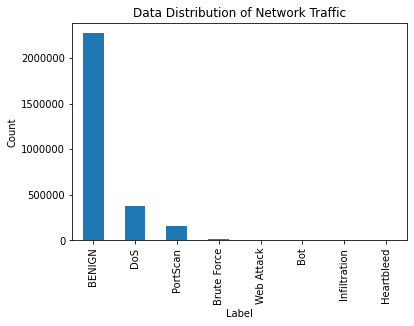

In [13]:
combine_df_new["Label"].value_counts().plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Data Distribution of Network Traffic')

plt.show()

In [14]:
combine_df_new = combine_df_new.drop(combine_df_new[(combine_df_new["Label"] == "Heartbleed") | (combine_df_new["Label"] == "Infiltration")].index)

In [15]:
combine_df_new["Label"].value_counts()

BENIGN         2271320
DoS             379737
PortScan        158804
Brute Force      13832
Web Attack        2180
Bot               1956
Name: Label, dtype: int64

# Under-sampling Minority Class

In [16]:
df_minor = combine_df_new[(combine_df_new['Label']=='Web Attack')|(combine_df_new['Label']=='Bot')|(combine_df_new['Label']=='Brute Force')]

In [17]:
df_BENIGN = combine_df_new[(combine_df_new['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, random_state=None, axis=0)

In [18]:
df_BENIGN

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1585895,53,31166,2,2,68,132,34,34,34.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2454259,53,193,2,2,70,166,35,35,35.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2337112,53,30541,1,1,51,136,51,51,51.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1907487,53,23415,1,1,43,87,43,43,43.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1677563,53,46276,1,1,43,175,43,43,43.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391372,53,205,2,2,110,452,55,55,55.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1946621,53,31163,4,2,176,200,44,44,44.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1117243,53,218,2,2,70,390,35,35,35.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
361453,35668,24,1,1,0,0,0,0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [19]:
df_DoS = combine_df_new[(combine_df_new['Label']=='DoS')]
df_DoS = df_DoS.sample(n=None, frac=0.05, random_state=None, axis=0)

In [20]:
df_DoS

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
560032,80,4,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS
737270,80,84075177,8,6,399,11595,393,0,49.875000,138.659333,...,20,1000.0,0.0,1000,1000,83000000.0,0.0,83000000,83000000,DoS
625193,80,98897760,7,6,396,11595,396,0,56.571429,149.673931,...,32,5.0,0.0,5,5,98900000.0,0.0,98900000,98900000,DoS
1832140,80,4049904,5,0,30,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS
1740741,80,4064952,5,0,30,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535846,80,100016664,5,7,369,11595,357,0,73.800000,158.342035,...,20,11959.0,0.0,11959,11959,99900000.0,0.0,99900000,99900000,DoS
538092,80,98302806,6,7,335,11595,317,0,55.833333,127.978774,...,20,13013.0,0.0,13013,13013,98300000.0,0.0,98300000,98300000,DoS
556456,80,100389927,6,7,365,11595,353,0,60.833333,143.162029,...,20,11024.0,0.0,11024,11024,99200000.0,0.0,99200000,99200000,DoS
699135,80,989,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS


In [21]:
df_PortScan = combine_df_new[(combine_df_new['Label']=='PortScan')]
df_PortScan = df_PortScan.sample(n=None, frac=0.1, random_state=None, axis=0)

In [22]:
df_PortScan

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2638911,9535,71,1,1,2,6,2,2,2.0,0.0,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
2726268,2288,89,1,1,0,6,0,0,0.0,0.0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
2664471,3369,36,1,1,2,6,2,2,2.0,0.0,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
2720236,19,50,1,1,0,6,0,0,0.0,0.0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
2678931,8007,49,1,1,2,6,2,2,2.0,0.0,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652329,720,52,1,1,2,6,2,2,2.0,0.0,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
2756558,2111,59,1,1,0,6,0,0,0.0,0.0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
2669560,20005,54,1,1,2,6,2,2,2.0,0.0,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
2671534,9103,37,1,1,2,6,2,2,2.0,0.0,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan


In [23]:
undersampled_df = pd.concat([df_minor, df_BENIGN, df_DoS, df_PortScan], ignore_index=True)

In [24]:
undersampled_df = shuffle(undersampled_df).reset_index(drop=True)

In [25]:
undersampled_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,81613191,8,6,56,11607,20,0,7.000000,5.656854,...,20,1988.0,0.0,1988,1988,40700000.0,46200000.0,73400000,8098847,DoS
1,80,1713380,3,4,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS
2,21,224,2,1,14,0,14,0,7.000000,9.899495,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
3,80,11910655,4,0,24,0,6,6,6.000000,0.000000,...,20,1011.0,0.0,1011,1011,11900000.0,0.0,11900000,11900000,DoS
4,22,67,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75543,80,89902862,8,6,56,11607,20,0,7.000000,5.656854,...,20,5.0,0.0,5,5,44300000.0,49500000.0,79400000,9309862,DoS
75544,48742,2,3,0,12,0,6,0,4.000000,3.464102,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
75545,80,5581855,4,0,24,0,6,6,6.000000,0.000000,...,20,996.0,0.0,996,996,5580859.0,0.0,5580859,5580859,DoS
75546,22,68,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force


In [26]:
undersampled_df["Label"].value_counts()

BENIGN         22713
DoS            18987
PortScan       15880
Brute Force    13832
Web Attack      2180
Bot             1956
Name: Label, dtype: int64

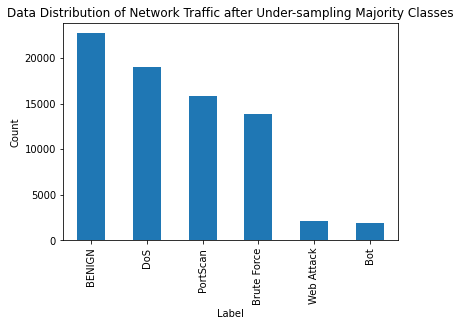

In [27]:
undersampled_df["Label"].value_counts().plot(kind='bar')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Data Distribution of Network Traffic after Under-sampling Majority Classes')

plt.show()

In [28]:
le = LabelEncoder()
undersampled_df["Label"] = le.fit_transform(undersampled_df["Label"])
label_encoder_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_mapping, sep="\n")

Mapping of Label Encoded Classes
{'BENIGN': 0, 'Bot': 1, 'Brute Force': 2, 'DoS': 3, 'PortScan': 4, 'Web Attack': 5}


In [29]:
undersampled_df["Label"].value_counts()

0    22713
3    18987
4    15880
2    13832
5     2180
1     1956
Name: Label, dtype: int64

# Oversampling using SMOTE

In [30]:
X = undersampled_df.drop("Label", axis=1).values
y = undersampled_df["Label"].values

In [31]:
smote=SMOTE(n_jobs=-1,sampling_strategy={1:10000, 5:10000})

In [32]:
X_resampled, y_resampled = smote.fit_resample(X, y)

/users/grad/arkag/.local/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [33]:
resampled_df = pd.DataFrame(X_resampled, columns=undersampled_df.drop("Label", axis=1).columns)
resampled_df["Label"] = y_resampled


In [34]:
resampled_df["Label"].value_counts()

0    22713
3    18987
4    15880
2    13832
1    10000
5    10000
Name: Label, dtype: int64

In [99]:
resampled_df["Label"] = le.inverse_transform(resampled_df["Label"])

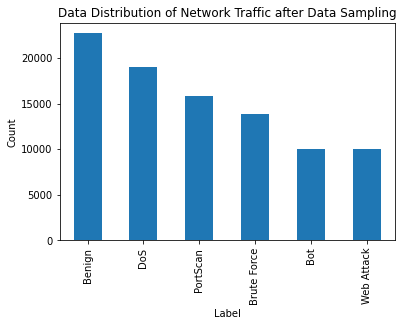

In [41]:
label_mapping = {0: 'Benign', 1: 'DoS', 2: 'PortScan', 3: 'Brute Force', 4: 'Bot', 5: 'Web Attack'}

# Plot the bar chart
resampled_df["Label"].value_counts().plot(kind='bar')

# Modify the x-axis labels
plt.xticks(resampled_df["Label"].unique(), [label_mapping[label] for label in resampled_df["Label"].unique()])

# Set axis labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Data Distribution of Network Traffic after Data Sampling')

# Display the plot
plt.show()

In [101]:
#resampled_df.to_csv("CICIDS2017_Pre-processed.csv", index = False)

# Feature Selection using Mutual Information

In [42]:
resampled_df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80.0,81613191.0,8.0,6.0,56.0,11607.0,20.0,0.0,7.000000,5.656854,...,20.0,1988.0,0.0,1988.0,1988.0,40700000.0,46200000.0,73400000.0,8098847.0,3
1,80.0,1713380.0,3.0,4.0,26.0,11607.0,20.0,0.0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,21.0,224.0,2.0,1.0,14.0,0.0,14.0,0.0,7.000000,9.899495,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,80.0,11910655.0,4.0,0.0,24.0,0.0,6.0,6.0,6.000000,0.000000,...,20.0,1011.0,0.0,1011.0,1011.0,11900000.0,0.0,11900000.0,11900000.0,3
4,22.0,67.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [43]:
X = resampled_df.drop(columns=['Label'], axis = 1).values
y = resampled_df['Label'].values

In [45]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
mi_scores = mutual_info_classif(X_scaled, y)

In [48]:
feature_importance_df = pd.DataFrame({'Feature': resampled_df.drop(columns=['Label']).columns, 'Mutual_Information': mi_scores})


In [49]:
feature_importance_df = feature_importance_df.sort_values(by='Mutual_Information', ascending=False)
feature_importance_df

,Feature,Mutual_Information
0,Destination Port,1.357143
40,Packet Length Mean,1.308055
52,Average Packet Size,1.295907
67,Init_Win_bytes_backward,1.253164
41,Packet Length Std,1.221008
...,...,...
49,CWE Flag Count,0.000000
56,Fwd Avg Bytes/Bulk,0.000000
61,Bwd Avg Bulk Rate,0.000000
60,Bwd Avg Packets/Bulk,0.000000


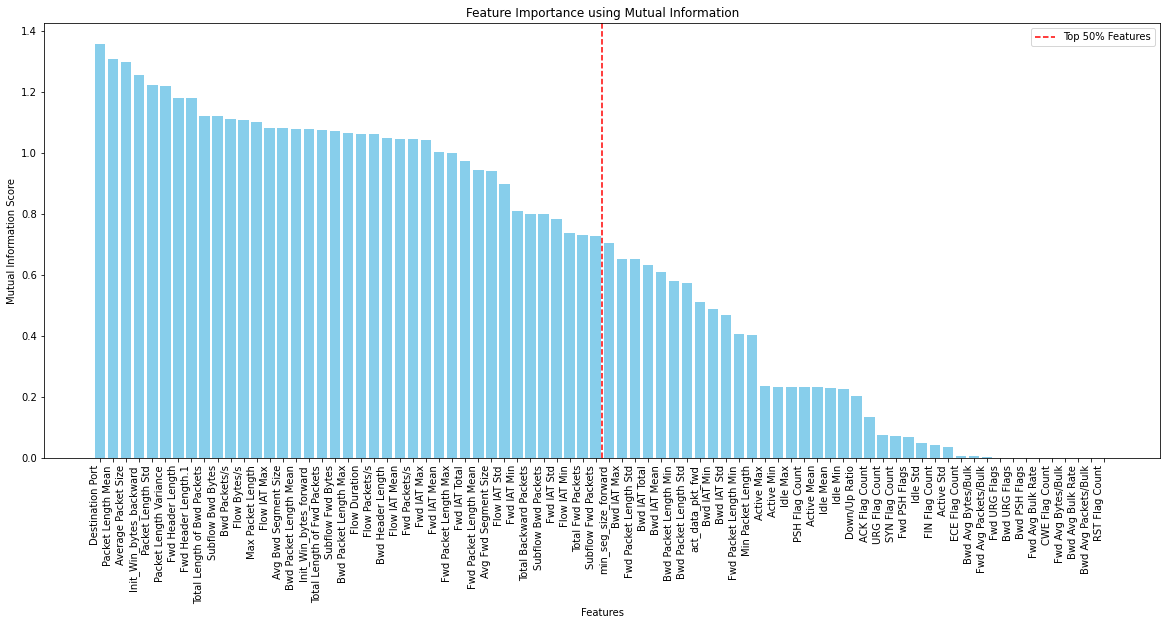

In [63]:
top_features_count = int(len(feature_importance_df) * 0.5)

plt.figure(figsize=(20, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Mutual_Information'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Feature Importance using Mutual Information')

plt.axvline(x=top_features_count - 0.5, color='red', linestyle='--', label='Top 50% Features')

plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

In [66]:
top_feature_names = feature_importance_df.head(top_features_count)['Feature'].tolist()
print(len(top_feature_names))

39


In [67]:
resampled_df_top50 = resampled_df[top_feature_names + ['Label']]
resampled_df_top50.head(5)

,Destination Port,Packet Length Mean,Average Packet Size,Init_Win_bytes_backward,Packet Length Std,Packet Length Variance,Fwd Header Length,Fwd Header Length.1,Total Length of Bwd Packets,Subflow Bwd Bytes,...,Avg Fwd Segment Size,Flow IAT Std,Fwd IAT Min,Total Backward Packets,Subflow Bwd Packets,Fwd IAT Std,Flow IAT Min,Total Fwd Packets,Subflow Fwd Packets,Label
0,80.0,777.933333,833.500000,229.0,1627.461760,2.648632e+06,172.0,172.0,11607.0,11607.0,...,7.000000,2.030000e+07,0.0,6.0,6.0,2.740000e+07,0.0,8.0,8.0,3
1,80.0,1454.125000,1661.857143,229.0,4097.537534,1.680000e+07,72.0,72.0,11607.0,11607.0,...,8.666667,6.989172e+05,95.0,4.0,4.0,4.794184e+02,16.0,3.0,3.0,3
2,21.0,7.000000,9.333333,0.0,8.082904,6.533333e+01,64.0,64.0,0.0,0.0,...,7.000000,3.959798e+01,224.0,1.0,1.0,0.000000e+00,84.0,2.0,2.0,2
3,80.0,6.000000,7.500000,-1.0,0.000000,0.000000e+00,80.0,80.0,0.0,0.0,...,6.000000,6.875744e+06,1.0,0.0,0.0,6.875744e+06,1.0,4.0,4.0,3
4,22.0,0.000000,0.000000,247.0,0.000000,0.000000e+00,32.0,32.0,0.0,0.0,...,0.000000,0.000000e+00,0.0,1.0,1.0,0.000000e+00,67.0,1.0,1.0,2


In [68]:
resampled_df_top50["Label"] = le.inverse_transform(resampled_df_top50["Label"])

<ipython-input-68-70828d156a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampled_df_top50["Label"] = le.inverse_transform(resampled_df_top50["Label"])


In [71]:
resampled_df_top50.to_csv("CICIDS2017_Pre-processed.csv", index = False)